# INTRODUCCIÓN

La leucemia (cáncer de la sangre) es un tipo de cáncer causado por el desajuste del nivel de glóbulos blancos de la sangre, también denominados leucocitos, los cuales son parte fundamental del sistema inmunológico, ya que se encargan de luchar contra infecciones y enfermedades. La leucemia aparece debido a la generación en masa de leucocitos inmaduros en la sangre y la médula ósea, causando un desajuste que impide al sistema inmunológico actuar correctamente.

La leucemia aguda aparece cuando glóbulos blancos infectados que no se comportan de la forma esperable proliferan rápidamente, al contrario que en el caso crónico, dónde crecen más lentamente y actúan de forma normal. También se distingue entre leucemia linfática y mieloide según la forma y el tamaño de los leucocitos, dando lugar a cuatro subtipos de leucemia: linfoblástica aguda (ALL), mieloide aguda (AML), linfoblástica crónica (CLL) y mieloide crónica (CML).

La inteligencia artificial puede ayudar en el diagnóstico temprano de la enfermedad, identificando correctamente las células presentes en pruebas de frotis de sangre, procurando así una mayor posibilidad de superación del cáncer.

Mediante la realización de esta demo se pretende que el usuario pueda comprender los conjuntos de datos utilizados, las tareas realizadas y sea capaz de observar el resultado del entrenamiento de los modelos y realizar alguna inferencia sobre las imágenes.


## Índice

1. Imports requeridos
2. Muestra de imágenes de los datasets
3. Clasificación de ALL
4. Detección de ALL
5. Resumen y líneas de mejora
6. Recursos utilizados

## Import de librerías necesarias

In [2]:
import os
import cv2

import matplotlib.pyplot as plt

from ultralytics import YOLO

## Muestra de imágenes de los datasets

Para comenzar, se muestran las imágenes pertenecientes a los datasets de utilizados en el desarrollo de este trabajo.

* El conjunto CNMC_Leukemia solo cuenta con imágenes útiles para la clasificación, ya que están centradas en mostrar una única célula, pero supone la gran mayoría de las imágenes disponibles. 

* Por su parte, ALL_IDB está dividido en dos conjuntos, ALL_IDB1 contiene imágenes donde se muestran distintos tipos de células y sobre las que existen muestras normales y muestras en las que hay células leucémicas. ALL_IDB2 son recortes de las imágenes de ALL_IDB1, centradas en los leucocitos para obtener un pequeño dataset con el que poder entrenar un modelo para la clasificación.

A continuación, se imprime una imagen de cada dataset tanto para la clase afectada por la enfermedad como para células sanas.

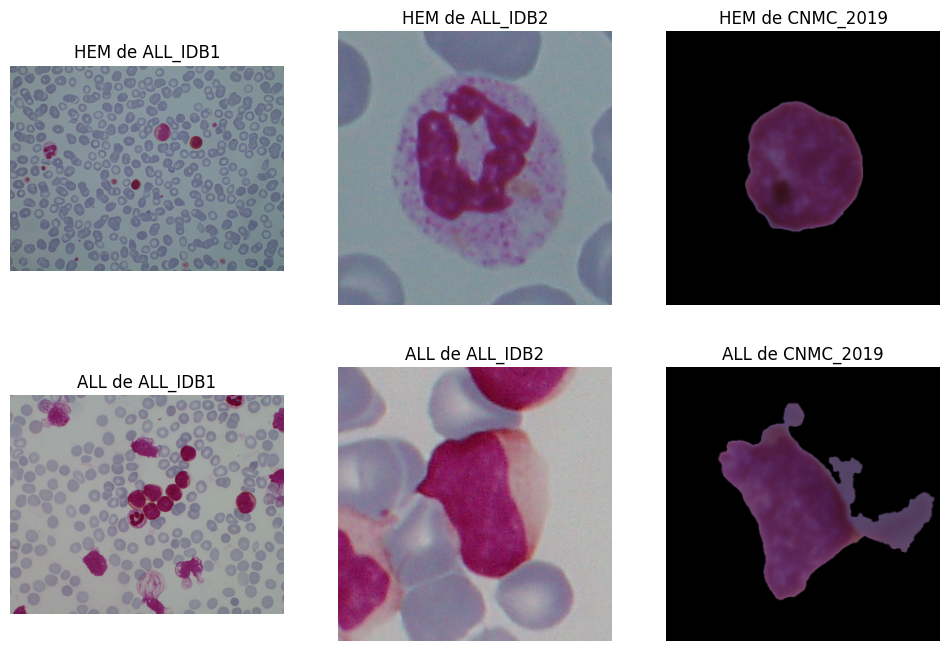

In [17]:
rows = 2
columns = 3

fig = plt.figure(figsize=(12,8))

img1 = cv2.imread("demo_imgs/img_1.jpg")
img2 = cv2.imread("demo_imgs/img_2.jpg")
img3 = cv2.imread("demo_imgs/img_3.tif")
img4 = cv2.imread("demo_imgs/img_4.tif")
img5 = cv2.imread("demo_imgs/img_5.tif")
img6 = cv2.imread("demo_imgs/img_6.tif")

fig.add_subplot(rows, columns, 1)
plt.imshow(img1) 
plt.axis('off') 
plt.title("HEM de ALL_IDB1") 
  
fig.add_subplot(rows, columns, 2) 
plt.imshow(img3) 
plt.axis('off') 
plt.title("HEM de ALL_IDB2") 
  
fig.add_subplot(rows, columns, 3) 
plt.imshow(img5) 
plt.axis('off') 
plt.title("HEM de CNMC_2019") 
  
fig.add_subplot(rows, columns, 4) 
plt.imshow(img2) 
plt.axis('off') 
plt.title("ALL de ALL_IDB1")

fig.add_subplot(rows, columns, 5) 
plt.imshow(img4) 
plt.axis('off') 
plt.title("ALL de ALL_IDB2") 
  
fig.add_subplot(rows, columns, 6) 
plt.imshow(img6) 
plt.axis('off') 
plt.title("ALL de CNMC_2019")

plt.show()

# Clasificación de ALL

### Preprocesado

Antes de comenzar el entrenamiento, se muestra los cambios realizados a las imágenes. Dos operaciones son llevadas a cabo:

1. Cambio de formato BMP a TIFF: Con el proposito de normalizar los datos, se ha decidido cambiar el formato en que las imágenes se guardan para que todos utilicen el mismo. Esto no debería de suponer un cambio casi perceptible, ya que en el cambio de formato no se pierde información, pero por ordenar el conjunto de datos global y viendo las ventajas que el formato TIFF tiene frente al BMP, se ha decidido implementar este sencillo cambio.

2. Cambio de tamaño de las imágenes: Al disponer de dos conjuntos de datos diferentes y querer juntarlos en uno solo, se ha de afrontar que las imágenes tengan parámetros diferentes. Uno de ellos es el tamaño de la imagen, el cuál es necesario cambiar para que la red entrenada tenga siempre un input del mismo tamaño en la capa de entrada. En las gráficas de abajo, se puede ver como las imágenes pertenecientes al dataset CNMC han sido reducidas de 450x450 píxeles a 256x256 sin tener cambios notorios. Las imágenes de ALL_IDB también han sido reducidas de 257x257 a 256x256, ya que la arquitectura YOLO requiere que las imágenes de entrada tengan un tamaño múltiplo de 32 (que es el stride utilizando durante las convoluciones).

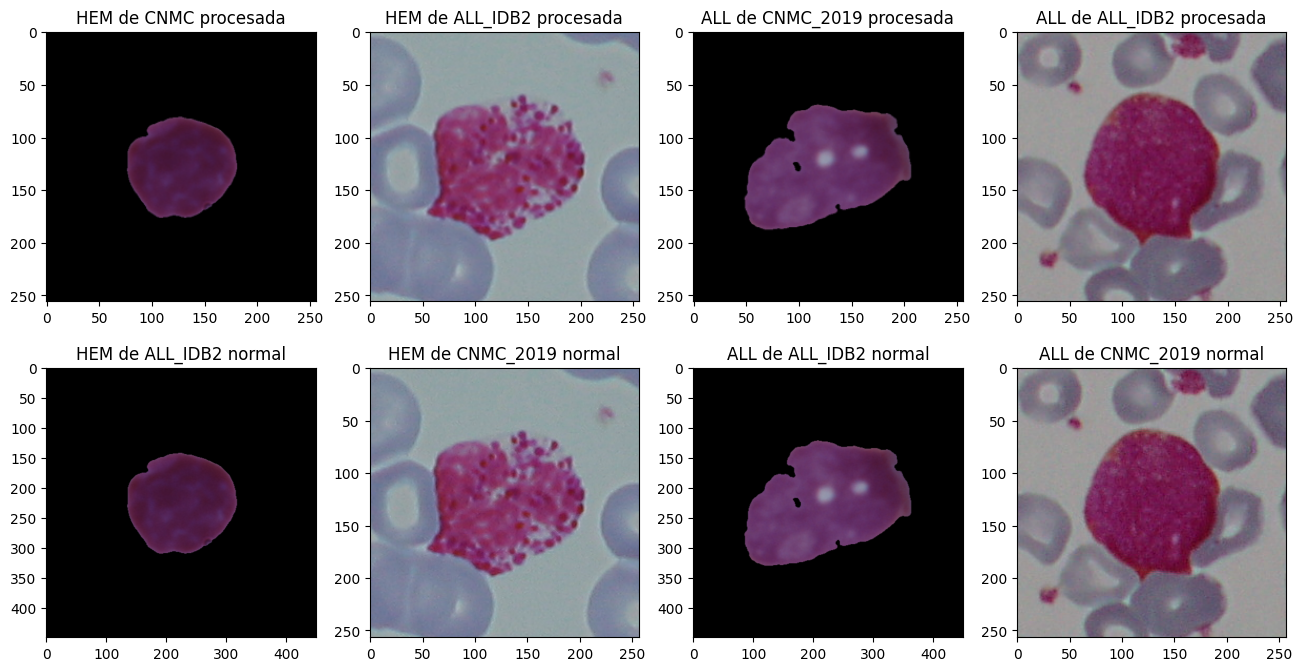

In [28]:

rows = 2
columns = 4

fig = plt.figure(figsize=(16,8))

img1 = cv2.imread("demo_imgs_preproc/hem_cnmc.tif")
img2 = cv2.imread("demo_imgs_preproc/hem_idb2.tif")
img3 = cv2.imread("demo_imgs_preproc/all_cnmc.tif")
img4 = cv2.imread("demo_imgs_preproc/all_idb2.tif")
img5 = cv2.imread("demo_imgs_preproc/hem_cnmc_or.bmp")
img6 = cv2.imread("demo_imgs_preproc/hem_idb2_or.tif")
img7 = cv2.imread("demo_imgs_preproc/all_cnmc_or.bmp")
img8 = cv2.imread("demo_imgs_preproc/all_idb2_or.tif")

fig.add_subplot(rows, columns, 1)
plt.imshow(img1)
plt.title("HEM de CNMC procesada") 
  
fig.add_subplot(rows, columns, 2) 
plt.imshow(img2)
plt.title("HEM de ALL_IDB2 procesada") 
  
fig.add_subplot(rows, columns, 3) 
plt.imshow(img3)
plt.title("ALL de CNMC_2019 procesada") 
  
fig.add_subplot(rows, columns, 4) 
plt.imshow(img4)
plt.title("ALL de ALL_IDB2 procesada")

fig.add_subplot(rows, columns, 5)
plt.imshow(img5)
plt.title("HEM de ALL_IDB2 normal") 
  
fig.add_subplot(rows, columns, 6) 
plt.imshow(img6)
plt.title("HEM de CNMC_2019 normal") 

fig.add_subplot(rows, columns, 7) 
plt.imshow(img7)
plt.title("ALL de ALL_IDB2 normal") 
  
fig.add_subplot(rows, columns, 8)
plt.imshow(img8)
plt.title("ALL de CNMC_2019 normal")

plt.show()

### Carga del modelo

En la siguiente celda, se puede escoger sobre que modelo de clasificación cargar y observar las métricas de dicho modelo.

In [ ]:
yolo_model = ""

model = YOLO("modelos/cls/yolov8s.pt")

### Inferencia sobre imágenes

Por último, se da un conjunto de imágenes sobre las que elegir para realizar una inferencia, donde los resultados deberían de ser:

* Imágenes de la 1 a la 10 -> ALL
* Imágenes de la 11 a la 20 -> HEM


In [ ]:
img_path = ""

results = model("demo_imgs_preproc/hem_cnmc.tif")

# Detección

### Dibujo de bounding boxes en las imágenes de ALL_IDB1

Para obtener más información sobre los recursos utilizados se puede visitar:

* Kaggle - CNMC_Leukemia: https://www.kaggle.com/datasets/andrewmvd/leukemia-classification
* Università degli Studi di Milano - ALL_IDB: https://scotti.di.unimi.it/all/
